# PANDAS
本章提供Pandas常用操作!

## 首先匯入資料

### 資料讀取

#### CSV

In [7]:
import pandas as pd
import numpy as np
df = pd.read_csv('testData.csv')

### 產生資料

#### Series

##### 不指定index

In [8]:
s1 = pd.Series([1, 3, 6, np.nan, 44, 1]) #不指定index
s1

0     1.0
1     3.0
2     6.0
3     NaN
4    44.0
5     1.0
dtype: float64

##### 指定index

In [9]:
s2 = pd.Series([1, 2, 3], index={'a', 'b', 'c'}) #指定index
s2

a    1
c    2
b    3
dtype: int64

#### DataFrame(表格)

In [10]:
s1 = pd.Series([1, 1, 2, 1, 2, 2, 3])
s2 = pd.Series([201301, 201301, 201301, 201302, 201302, 201302, 201302])
table = pd.DataFrame(
    {
        'CLIENTCODE': s1,
        'YEARMONTH': s2
    })
table

,CLIENTCODE,YEARMONTH
0,1,201301
1,1,201301
2,2,201301
3,1,201302
4,2,201302
5,2,201302
6,3,201302


## 檢視資料

### 檢視資料狀態

In [11]:
df.shape #可以知道有多少比資料/變數, 代表31筆資料, 以及3個變數.

(31, 4)

### 檢視變數型態

In [12]:
df.info() #檢查變數為哪種型態

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31 entries, 0 to 30
Data columns (total 4 columns):
DateId                31 non-null object
ShopId                31 non-null object
TrackSourceTypeDef    31 non-null object
Quantity              31 non-null int64
dtypes: int64(1), object(3)
memory usage: 1.0+ KB


### 檢視前幾筆資料

In [13]:
df.head() #預設列出前五筆資料, 若要顯示前N筆: dr.head(N)

,DateId,ShopId,TrackSourceTypeDef,Quantity
0,2017/1/1,A,App,5
1,2017/1/2,B,Web,3
2,2017/1/3,A,Web,4
3,2017/1/4,D,App,12
4,2017/1/5,A,Web,5


### 檢視後幾筆資料

In [14]:
df.tail() #預設列出最後五筆資料, 若要顯示最後N筆: dr.tail(N)

,DateId,ShopId,TrackSourceTypeDef,Quantity
26,2017/1/27,C,App,35
27,2017/1/28,B,Web,5
28,2017/1/29,C,Web,4
29,2017/1/30,B,App,12
30,2017/1/31,A,Web,2


### 檢視特定欄位

In [15]:
df['TrackSourceTypeDef'].head() #取特定欄位的前五筆資料

0    App
1    Web
2    Web
3    App
4    Web
Name: TrackSourceTypeDef, dtype: object

### 檢視第N筆資料

In [16]:
df.loc[3] #顯示第4筆資料的資訊, 其中資料從0開始

DateId                2017/1/4
ShopId                       D
TrackSourceTypeDef         App
Quantity                    12
Name: 3, dtype: object

### 檢視第N~M筆資料

In [17]:
df.loc[0:20, ['DateId', 'TrackSourceTypeDef']] #顯示特定幾筆/欄位的資料

,DateId,TrackSourceTypeDef
0,2017/1/1,App
1,2017/1/2,Web
2,2017/1/3,Web
3,2017/1/4,App
4,2017/1/5,Web
5,2017/1/6,Web
6,2017/1/7,App
7,2017/1/8,Web
8,2017/1/9,App
9,2017/1/10,Web


## 篩選

### 以特定欄位條件篩選資料, 並存成DF

In [18]:
df[df['TrackSourceTypeDef'] == 'App'] #提供條件, 篩選符合的資料

,DateId,ShopId,TrackSourceTypeDef,Quantity
0,2017/1/1,A,App,5
3,2017/1/4,D,App,12
6,2017/1/7,D,App,6
8,2017/1/9,E,App,7
10,2017/1/11,D,App,3
11,2017/1/12,C,App,4
12,2017/1/13,B,App,3
15,2017/1/16,B,App,2
17,2017/1/18,A,App,3
21,2017/1/22,B,App,23


## 資料分組

### 以某欄位做為Key, 並對Data做運算

In [19]:
data = df.groupby('ShopId')['Quantity'].sum()
# ['ShopId'].count() #將特定資料作為index算特定欄位的總和
data.head(10)

ShopId
A    28
B    95
C    47
D    77
E     9
Name: Quantity, dtype: int64

若要再存成dataFrame(or Series)

In [20]:
df_ShopId = pd.DataFrame(data)
df_ShopId

,Quantity
ShopId,
A,28
B,95
C,47
D,77
E,9


## 繪圖

In [21]:
import matplotlib.pyplot as plt

### Series.plot()之參數
* **kind**: *str*  
        決定圖表型態.
    * line
    * bar 
    * barh
    * hist
    * box
    * kde
    * density
    * area
    * pie
* **ax**: *matplotlib axes object*
* **figsize**: *(width, height)*, 
        調整圖片大小.
* **use_index**: *boolean, default True*, 
        將索引當作刻度標籤.
* **title**: *str or list*, 
        圖表標題.
* **grid**: *boolean, default None (matlab style default)*, 
        顯示網格.
* **legend**: *False/True/'reverse'*, 
        顯示數值標籤.
* **style**: *list or dict*, 
        圖表的風格.
* **logx**: *boolean, default False*, 
        x軸使用對數尺度.
* **logy**: *boolean, default False*, 
        y軸使用對數尺度.
* **loglog**: *boolean, default False*, 
        兩軸都取對數.
* **xticks**: *sequence*, 
        用作x軸刻度的值.
* **yticks**: *sequence*, 
        用作y軸刻度的值.
* **xlim**: *2-tuple/list*, 
        x軸的界限, 例如:[0, 10].
* **ylim**: *2-tuple/list*,
        y軸的界限, 例如:[0, 10].
* **rot**: *int*, 
        旋轉刻度標籤.
* **fontsize**: *int, default None*, 
        Font size for xticks and yticks
* **colormap**: *str or matplotlib colormap object, default None*, 
        Colormap to select colors from. If string, load colormap with that name from matplotlib.
* **colorbar**: *boolean, optional*, 
        If True, plot colorbar (only relevant for ‘scatter’ and ‘hexbin’ plots)
* **position**: *float*, 
        Specify relative alignments for bar plot layout. From 0 (left/bottom-end) to 1 (right/top-end). Default is 0.5 (center).
* **yerr**: *DataFrame, Series, array-like, dict and str*, 
        See Plotting with Error Bars for detail.
* **xerr**: 
        same types as yerr.
* **label**: *label argument to provide to plot*
* **secondary_y**: *boolean or sequence of ints, default False*, 
        If True then y-axis will be on the right.
* **mark_right**: *boolean, default True, When using a secondary_y axis*, 
        automatically mark the column labels with “(right)” in the legend.
* **kwds**: *keywords, Options to pass to matplotlib plotting method.*
* **alpha**: *int: 0~1*, 
        資料曲線的透明度.

### DataFrame.plot()之參數
* **kind**: *str*  
        決定圖表型態.
    * line
    * bar 
    * barh
    * hist
    * box
    * kde
    * density
    * area
    * pie
    * scatter
    * hexbin
* **ax**: *matplotlib axes object, default None*
        指定在subplot裡的位置, 方法如範例.
* **subplots**: *boolean, default False*,
        將各個資料繪製到單獨的subplot中.
* **sharex**: *boolean, default True if ax is None else False*
        x軸刻度同步.
* **sharey**: *boolean, default False*
        y軸刻度同步.
* **layout**: *tuple (optional)*
        (rows, columns) for the layout of subplots
* **figsize**: *(width, height)*, 
        調整圖片大小.
* **use_index**: *boolean, default True*, 
        將索引當作刻度標籤.
* **title**: *str or list*, 
        圖表標題.
* **grid**: *boolean, default None (matlab style default)*, 
        顯示網格.
* **legend**: *False/True/'reverse'*, 
        顯示數值標籤.
* **style**: *list or dict*, 
        圖表的風格.
* **logx**: *boolean, default False*, 
        x軸使用對數尺度.
* **logy**: *boolean, default False*, 
        y軸使用對數尺度.
* **loglog**: *boolean, default False*, 
        兩軸都取對數.
* **xticks**: *sequence*, 
        用作x軸刻度的值.
* **yticks**: *sequence*, 
        用作y軸刻度的值.
* **xlim**: *2-tuple/list*, 
        x軸的界限, 例如:[0, 10].
* **ylim**: *2-tuple/list*,
        y軸的界限, 例如:[0, 10].
* **rot**: *int, default None*, 
        旋轉刻度標籤.
* **fontsize**: *int, default None*, 
        Font size for xticks and yticks
* **colormap**: *str or matplotlib colormap object, default None*, 
        Colormap to select colors from. If string, load colormap with that name from matplotlib.
* **colorbar**: *boolean*, 
        If True, plot colorbar (only relevant for ‘scatter’ and ‘hexbin’ plots)
* **position**: *float*, 
        Specify relative alignments for bar plot layout. From 0 (left/bottom-end) to 1 (right/top-end). Default is 0.5 (center).
* **yerr**: *DataFrame, Series, array-like, dict and str*, 
        See Plotting with Error Bars for detail.
* **xerr**: 
        same types as yerr.
* **stacked**: *boolean, default False in line and bar plots, and True in area plot.* 
        繪製堆疊圖.
* **sort_columns**: *boolean, default False*,
        Sort column names to determine plot ordering
* **secondary_y**: *boolean or sequence of ints, default False*, 
        If True then y-axis will be on the right.
* **mark_right**: *boolean, default True, When using a secondary_y axis*, 
        automatically mark the column labels with “(right)” in the legend.
* **kwds**: *keywords, Options to pass to matplotlib plotting method.*
* **alpha**: *int: 0~1*, 
        資料曲線的透明度.

### 折線圖

#### Series

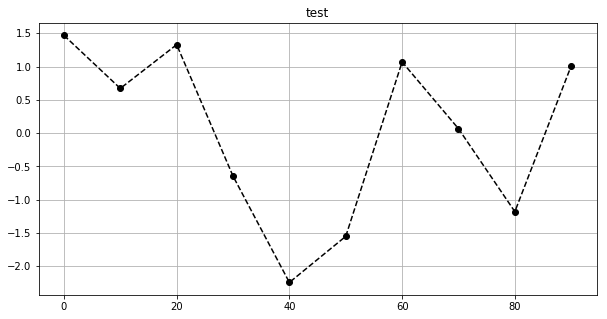

In [74]:
s = pd.Series(np.random.randn(10),index=np.arange(0,100,10))
s.plot(style='ko--', grid=True, title='test', figsize=(10,5))

#### DataFrame

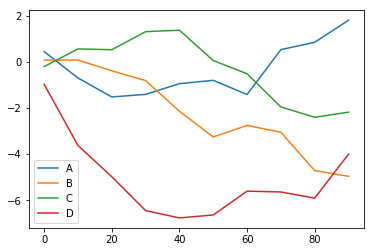

In [76]:
df1=pd.DataFrame(np.random.randn(10,4).cumsum(0),
             columns=['A','B','C','D'],
             index=np.arange(0,100,10))
df1.plot()

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000002585A95A710>,
      dtype=object)

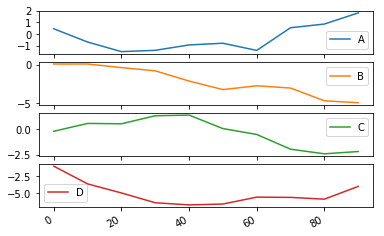

In [77]:
df1.plot(subplots=True)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x00000258585EE828>,
      dtype=object)

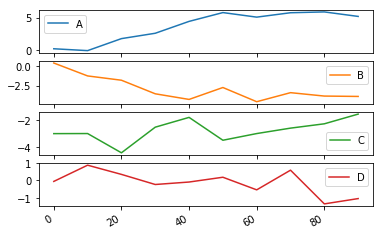

In [49]:
df1.plot(subplots=True, sharex=True)

### 柱狀圖

#### Series

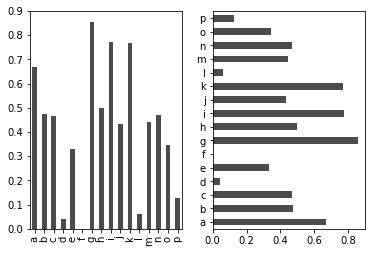

In [29]:
fig, axes = plt.subplots(1, 2) #兩圖顯示在一起
data = pd.Series(np.random.rand(16), index=list('abcdefghijklmnop'))
data.plot(kind='bar',ax=axes[0],color='k',alpha=0.7)
data.plot(kind='barh',ax=axes[1],color='k',alpha=0.7)

#### DataFrame

Genus         A         B         C         D
one    0.864772  0.369887  0.618422  0.177828
two    0.601871  0.644741  0.087539  0.697404
three  0.858369  0.982331  0.524228  0.017972
four   0.489719  0.930530  0.494026  0.546365
five   0.965498  0.008643  0.565760  0.376512
three  0.799523  0.845185  0.135677  0.112756


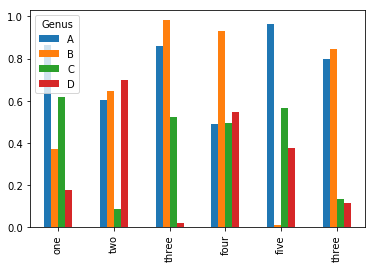

In [25]:
df2=pd.DataFrame(np.random.rand(6,4),
              index=['one','two','three','four','five','three'],
              columns=pd.Index(['A','B','C','D'],name='Genus'))
print(df2)
df2.plot(kind='bar')

### 柱狀堆疊圖

#### DataFrame

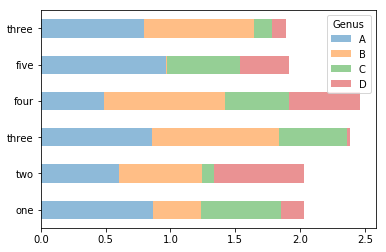

In [26]:
df2.plot(kind='barh',stacked=True,alpha=0.5)

### 正規化柱狀堆疊圖

#### DataFrame

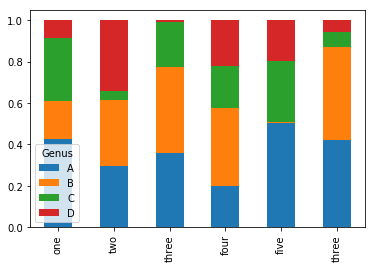

In [80]:
df2_pacts = df2.div(df2.sum(1).astype(float), axis=0)
df2_pacts.plot(kind='bar',stacked=True)